Necessary imports and settings

In [1]:
import glob
from PIL import Image
import numpy as np
import tensorflow as tf

dataFolder = "C:\\Users\\Aidan\\Desktop\\Code\\AI Robotics\\Project\\data"
inputImageSize = (256, 256)
batch_size = 32

data_loading_percentage = 20
trainTestSplit = 90

Loading data

In [14]:
imageSequences = glob.glob(dataFolder + "\\nyu2_train\\*")

validIndices = []
imageCount = 0

for imageSequence in imageSequences[0:int(len(imageSequences)*(data_loading_percentage/100))]:
    inputImages = glob.glob(imageSequence + "\\*.jpg")
    [validIndices.append(imageCount+j) for j in range(2, len(inputImages))]
    imageCount += len(inputImages)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 

In [5]:
def sortImages(inputList):
    return [x for _, x in sorted(zip([int(input[input.rfind("\\") + 1:-4]) for input in inputList], inputList))]

def print_progress_bar(iteration, total, prefix='', suffix='', length=25, fill='█'):
    percent = ("{0:.1f}").format(100 * (iteration / float(total)))
    filled_length = int(length * iteration // total)
    bar = fill * filled_length + '-' * (length - filled_length)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end='\r')
    # Print New Line on Complete
    if iteration == total-1: 
        print("\n")


imageData = np.empty((imageCount, inputImageSize[0], inputImageSize[1], 3), dtype='int16')
depthData = np.empty((imageCount, inputImageSize[0], inputImageSize[1]), dtype='int16')


imageSequences = glob.glob(dataFolder + "\\nyu2_train\\*")
index = 0

for i, imageSequence in enumerate(imageSequences[0:int(len(imageSequences)*(data_loading_percentage/100))]):
    inputImages = sortImages(glob.glob(imageSequence + "\\*.jpg"))
    depthImages = sortImages(glob.glob(imageSequence + "\\*.png"))

    imageData[index:index+len(inputImages)] = [np.asarray(Image.open(file).resize(inputImageSize), dtype='int16') for file in inputImages]
    depthData[index:index+len(depthImages)] = [np.asarray(Image.open(file).resize(inputImageSize), dtype='int16') for file in depthImages]

    index += len(inputImages)

    print_progress_bar(i, len(imageSequences[0:int(len(imageSequences)*(data_loading_percentage/100))]))

 |████████████████████████-| 98.2% 



In [16]:
def data_generator(data, labels, validIndices, batch_size):
    while True:
        selectedIndices = np.random.choice(validIndices, batch_size)
        batch_data = np.asarray([np.asarray(data[index-2:index+1]) for index in selectedIndices])
        batch_labels = np.asarray([np.asarray(labels[index]) for index in selectedIndices])
        yield batch_data, batch_labels

data_generator(imageData, depthData, validIndices, 8)

<generator object data_generator at 0x0000027ABEFFFA50>

In [18]:
dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(imageData, depthData, validIndices, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(batch_size, imageData.shape[1]), dtype=tf.int16),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.int16)
    )
)

# Configure for performance
dataset = dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [16]:
def sortImages(inputList):
    return [x for _, x in sorted(zip([int(input[input.rfind("\\") + 1:-4]) for input in inputList], inputList))]

def print_progress_bar(iteration, total, prefix='', suffix='', length=25, fill='█'):
    percent = ("{0:.1f}").format(100 * (iteration / float(total)))
    filled_length = int(length * iteration // total)
    bar = fill * filled_length + '-' * (length - filled_length)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end='\r')
    # Print New Line on Complete
    if iteration == total-1: 
        print("\n")



imageSequences = glob.glob(dataFolder + "\\nyu2_train\\*")

inputImageData = np.array([])
depthImageData = np.array([])
validIndices = np.array([])

for i, imageSequence in enumerate(imageSequences):
    inputImages = sortImages(glob.glob(imageSequence + "\\*.jpg"))
    depthImages = sortImages(glob.glob(imageSequence + "\\*.png"))

    rawInputImageData = [np.asarray(Image.open(file).resize(inputImageSize), dtype='int16') for file in inputImages]
    rawDepthImageData = [np.asarray(Image.open(file).resize(inputImageSize), dtype='int16') for file in depthImages]

    inputImageData = np.concatenate(inputImageData, )
    # rawInputImageSequence = [np.asarray(rawInputImageData[index-1:index+2]) for index in range(1, len(rawInputImageData)-1)]
    # rawDepthImageForSequence = rawDepthImageData[1:len(rawDepthImageData)-1]

    inputImageData.extend(rawInputImageData)
    depthImageData.extend(rawDepthImageData)

    print_progress_bar(i, len(imageSequences))

inputImageData = np.asarray(inputImageData)
depthImageData = np.asarray(depthImageData)


Print output shapes and show a sample of the data

(8, 3, 256, 256, 3)
(256, 256, 3)


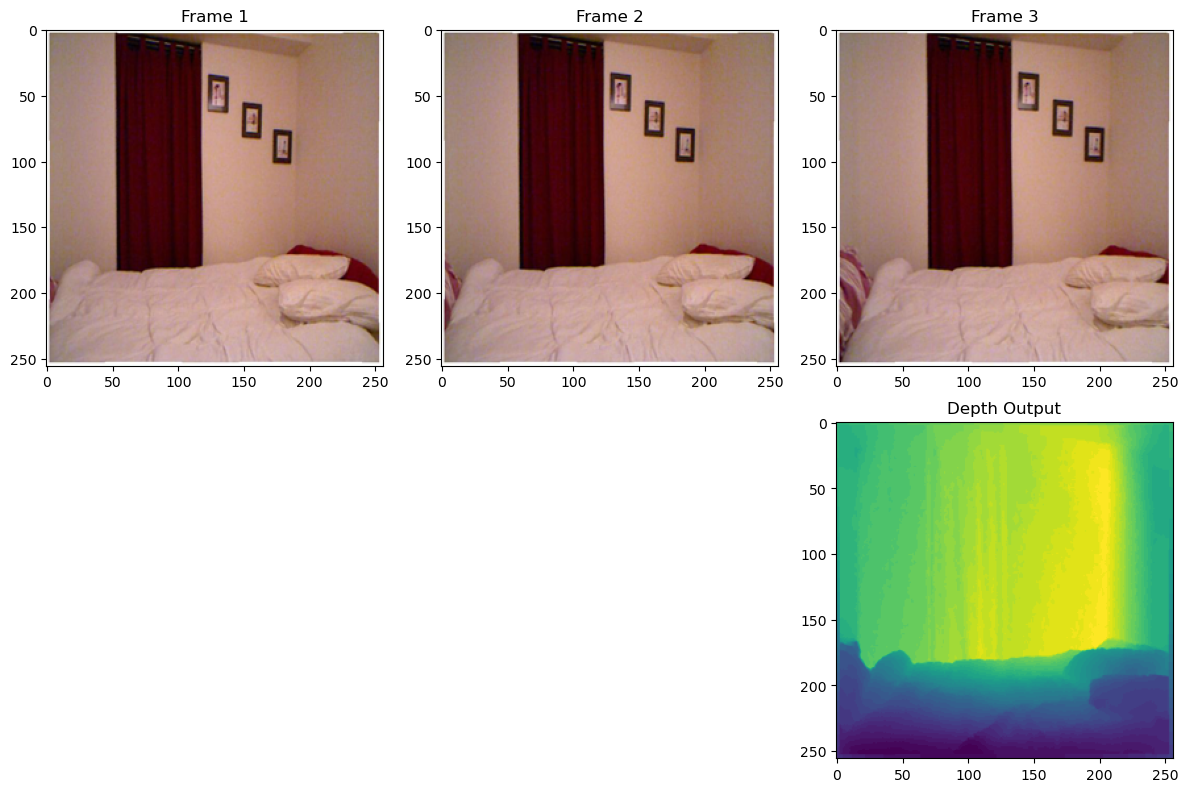

In [43]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

gen = data_generator(imageData, depthData, validIndices, 8)
sampleImages, sampleDepth = next(gen)
print(sampleImages[0][0].shape)

axes[0].imshow(sampleImages[0][0])
axes[0].set_title('Frame 1')
axes[1].imshow(sampleImages[0][1])
axes[1].set_title('Frame 2')
axes[2].imshow(sampleImages[0][2])
axes[2].set_title('Frame 3')
axes[5].imshow(sampleDepth[0])
axes[5].set_title('Depth Output')

for ax in axes[3:5]:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()